<a href="https://colab.research.google.com/github/jkworldchampion/Todays_Menu/blob/main/apply_image_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets.public_api as tfds
import numpy as np
import matplotlib.pyplot as plt
import json
import os
print(tf.__version__)

2.8.0


In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz  # https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/에 있는 download를 wget으로 가져온다.

--2022-05-31 00:12:46--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-05-31 00:12:47--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  17.9MB/s    in 4m 19s  

2022-05-31 00:17:07 (18.4 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:
!tar xzvf food-101.tar.gz  # tar명령어로 압축풀기 수행

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food

In [ ]:
!ls food-101

images	license_agreement.txt  meta  README.txt


In [ ]:
os.listdir('food-101/images')  # food-101/images에 있는 파일과 디렉토리를 출력한다.

['pancakes',
 'shrimp_and_grits',
 'apple_pie',
 'fish_and_chips',
 'croque_madame',
 'baklava',
 'lobster_roll_sandwich',
 'chicken_quesadilla',
 'ceviche',
 'foie_gras',
 'beef_carpaccio',
 'macarons',
 'tacos',
 'hummus',
 'chicken_curry',
 'onion_rings',
 'omelette',
 'seaweed_salad',
 'sashimi',
 'scallops',
 'ramen',
 'hamburger',
 'prime_rib',
 'peking_duck',
 'breakfast_burrito',
 'chocolate_cake',
 'pho',
 'ice_cream',
 'mussels',
 'french_onion_soup',
 'cannoli',
 'huevos_rancheros',
 'club_sandwich',
 'french_toast',
 'gnocchi',
 'gyoza',
 'nachos',
 'strawberry_shortcake',
 'edamame',
 'miso_soup',
 'carrot_cake',
 'cheese_plate',
 'caprese_salad',
 'cheesecake',
 'grilled_salmon',
 'pad_thai',
 'sushi',
 'filet_mignon',
 'macaroni_and_cheese',
 'escargots',
 'lobster_bisque',
 'french_fries',
 'donuts',
 'fried_calamari',
 'chocolate_mousse',
 'risotto',
 'spaghetti_carbonara',
 'tiramisu',
 'deviled_eggs',
 'crab_cakes',
 'paella',
 'baby_back_ribs',
 'lasagna',
 'bread_p

In [ ]:
os.listdir('food-101/meta')

['test.json',
 'classes.txt',
 'train.json',
 'test.txt',
 'train.txt',
 'labels.txt']

In [ ]:
!head food-101/meta/train.txt  # 맨위의 몇개를 살펴본다.

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [ ]:
!head food-101/meta/classes.txt  # 음식 클래스들이 뭐가 있는지 슬쩍 본다.

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


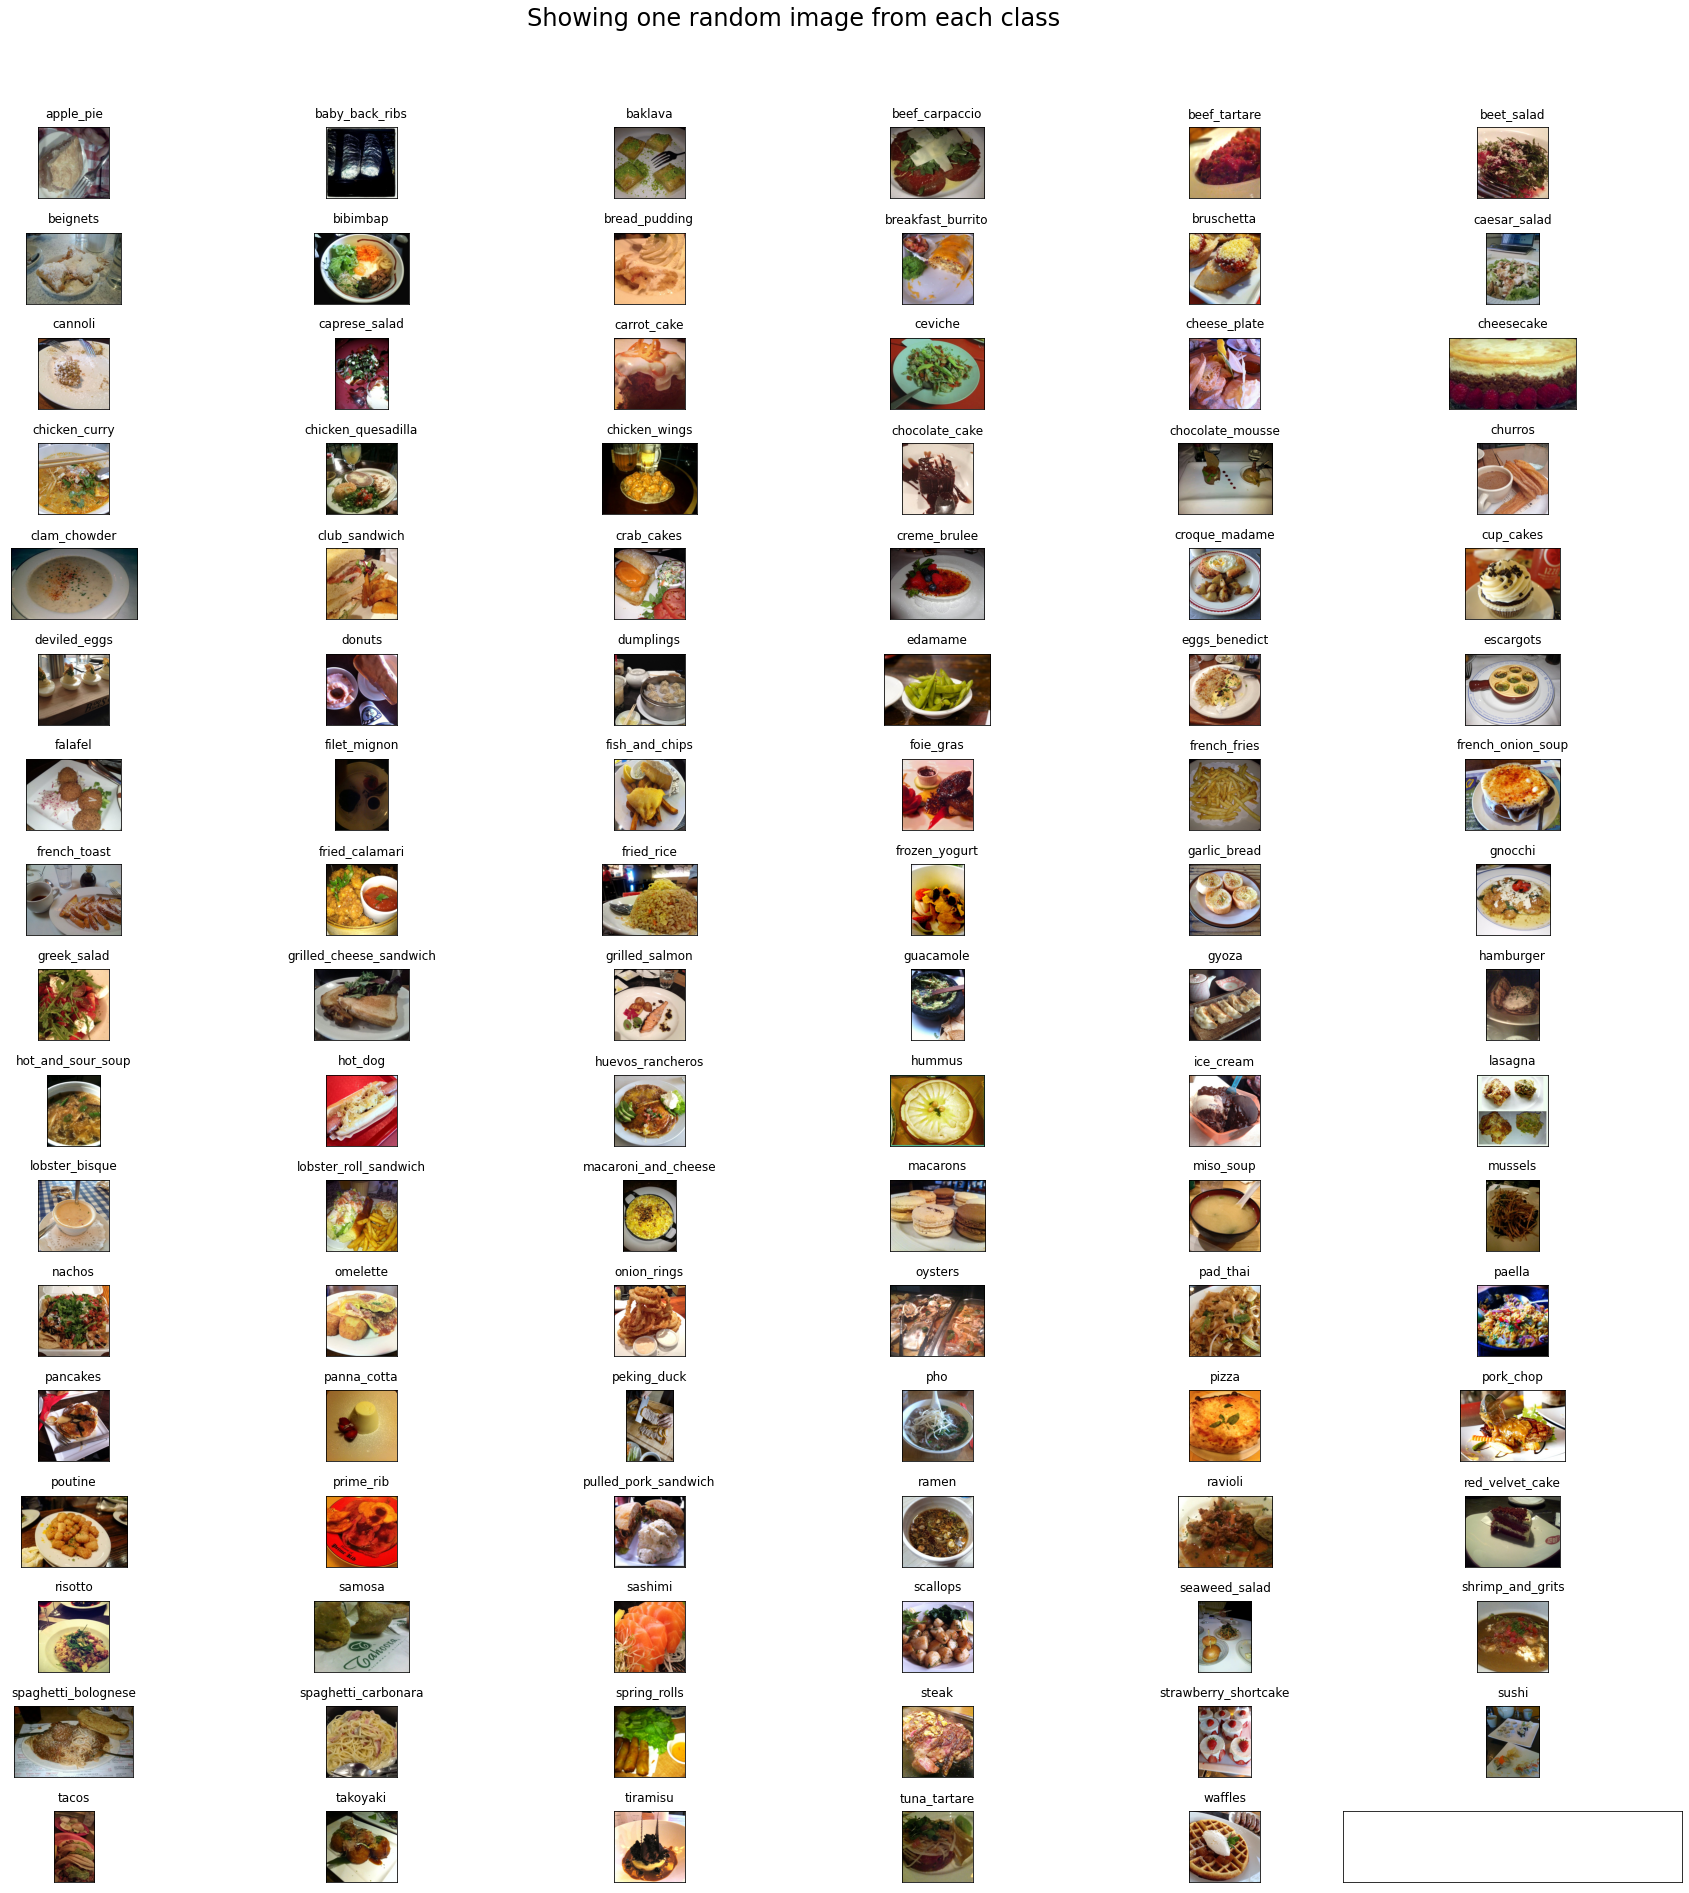

In [ ]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))  # 한 화면에 여러개가 보일 수 있도록 서브플롯을 만듦
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))  # os.listdir()의 반환 형태는 리스트
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':  # 아마 파일의 끝을 의미하는 듯. 메타데이터를 담은 파일.
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html

In [ ]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
%cd /
print("Creating train data...")
prepare_data('/kaggle/input/food-101/food-101/meta/train.txt', '/kaggle/input/food-101/food-101/images', 'train')